In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
import umap
import matplotlib.pyplot as plt

C:\Users\leoni\Desktop\pliki\python\nlp\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
docs = ["dwa plus dwa to cztery",
        "dwa minus dwa to zero",
        "osiem minus cztery to cztery",
        "o nie do wiary pan hilary zgubil swoje okulary"]

In [3]:
vectorizer = TfidfVectorizer()
vect = vectorizer.fit(docs)
result = vectorizer.transform(docs)
df = pd.DataFrame(result.toarray(), columns = vect.get_feature_names())

C:\Users\leoni\Desktop\pliki\python\nlp\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [4]:
print(df)

     cztery        do       dwa    hilary     minus       nie   okulary  \
0  0.371027  0.000000  0.742055  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.742055  0.000000  0.371027  0.000000  0.000000   
2  0.742055  0.000000  0.000000  0.000000  0.371027  0.000000  0.000000   
3  0.000000  0.353553  0.000000  0.353553  0.000000  0.353553  0.353553   

      osiem       pan      plus     swoje        to     wiary      zero  \
0  0.000000  0.000000  0.470601  0.000000  0.300379  0.000000  0.000000   
1  0.000000  0.000000  0.000000  0.000000  0.300379  0.000000  0.470601   
2  0.470601  0.000000  0.000000  0.000000  0.300379  0.000000  0.000000   
3  0.000000  0.353553  0.000000  0.353553  0.000000  0.353553  0.000000   

     zgubil  
0  0.000000  
1  0.000000  
2  0.000000  
3  0.353553  


In [5]:
reducer = umap.UMAP()
embedding = umap.UMAP(n_neighbors=2,
                      min_dist=0.3,
                      metric='correlation').fit_transform(result.toarray())

In [6]:
print(embedding)
print([element[0] for element in embedding])

[[17.193901  17.361273 ]
 [11.53636   15.702849 ]
 [16.407715  16.367123 ]
 [15.9869795 17.733398 ]]
[17.193901, 11.53636, 16.407715, 15.9869795]


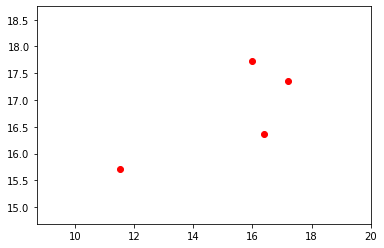

In [7]:
x = [element[0] for element in embedding]
y = [element[1] for element in embedding]
plt.plot(x, y, 'ro')
scale = 2.0
axis = np.array([(min(x) - max(x)) / 2 , (max(x) - min(x)) / 2, (min(y) - max(y)) / 2, (max(y) - min(y)) / 2])
axis *= scale;
axis += np.array([(max(x) + min(x)) / 2 , (max(x) + min(x)) / 2, (max(y) + min(y)) / 2, (max(y) + min(y)) / 2])
plt.axis(axis)
plt.show()